In [164]:
#import pandas for dataframes, import csv, import os for file handling
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #suppress futurewarnings from matplotlib
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd
from pandas import read_csv
import math
from scipy import stats as st
import csv
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBClassifier

global df
csv_name = 'pipeline_outputs_SAY_10-15-2021.csv' #INPUT csv name here
df = pd.read_csv(csv_name) #import csv
df_data = pd.read_csv("data.csv") #second data sheet

df_data.drop(['BMI','Sex'], axis=1,inplace =True)
df = df.merge(df_data, on="subject_id", how = 'left')
for col in df.columns:
    if (('GlobalEfficiency' in col) or ('MaximizedModularity' in col) 
        or ('MeanClusteringCoeff' in col) or ('MeanTotalStrength'in col)
        or ('NetworkCharacteristic' in col) or ('TotalStrength' in col)
        or ('dummyrest' in col) or ('session_id' in col) or ('subject_id' in col)
        or ('dummy_rest' in col) or ('file_name' in col) or ('1back' in col)
        or ('acq_id' in col) or ('anatomical_zstat1' in col) or ('datetime' in col)):
        del df[col]

df['Sex'].replace(['Female','Male'],[0,1],inplace=True)

for col in df.columns:
    if(df[col].isnull().values.any()):
        if(df[col].isnull().sum()>50):
            del(df[col])
    



df=df.dropna()
display(df)
df = df._get_numeric_data()

list_outliers = {} #global list of outliers for later use

study_name = "SAY" #INPUT study name
date = "10/15/2021" #INPUT date updated (mm/dd/yyyy)

,BMI,Age_x,Sex,MeanStrengthAAL116SC,MeanStrengthBrainnetome246SC,MeanStrengthPower264SC,MeanStrengthaal116aroma,MeanStrengthaal116despike,MeanStrengthaal116fc36p,MeanStrengthaal116scrub,...,tpm_overlap_wm_t1w,tsnr_rest,wm2max,wm2max_t1w,Age_y,peakvo2_ml_gxt,fft_4step_t1,fft_4step_t2,fft_stair_ds_tester1,fft_stair_us_tester1
1,31.154550,70.0,0.0,1.422724,1.776400,0.893985,8.395483,10.091157,10.273514,10.230522,...,0.505089,22.530750,0.212739,0.532208,70.0,23.0,4.94,4.47,6.59,7.28
2,34.014695,57.0,0.0,1.435609,2.609833,0.612921,10.231820,10.517965,10.270816,11.408486,...,0.507852,23.310408,0.211348,0.626513,57.0,19.2,5.96,5.48,8.90,8.17
3,28.065268,57.0,0.0,1.706886,2.233805,0.520914,10.854203,10.615294,10.972222,12.268026,...,0.499831,23.844503,0.226807,0.604455,57.0,26.5,4.93,4.41,6.16,7.09
5,26.993444,58.0,0.0,1.528399,2.388168,0.902695,13.099357,12.022468,12.730002,12.697185,...,0.494704,26.024578,0.220077,0.471029,58.0,22.4,5.91,5.11,6.47,6.28
6,28.028925,64.0,0.0,1.523874,2.112914,1.172172,11.300510,10.088036,10.260387,18.258431,...,0.474391,21.642605,0.188460,0.524598,64.0,20.7,7.00,6.35,6.25,8.75
10,28.462208,61.0,0.0,1.042583,1.984987,0.561681,9.786974,10.769288,11.142388,19.219821,...,0.478936,26.399752,0.211522,0.516014,61.0,15.7,7.94,8.25,8.34,11.22
11,24.230385,66.0,0.0,1.088230,1.742396,0.508412,12.394907,11.015452,11.166303,11.305598,...,0.479576,22.090466,0.201552,0.433061,66.0,23.4,6.50,6.16,6.34,8.22
12,22.990527,56.0,0.0,1.725018,2.205910,0.706634,8.502701,10.753888,11.002398,10.921539,...,0.491429,26.464197,0.218706,0.625233,56.0,23.8,6.94,7.31,6.35,7.34
13,26.056757,59.0,0.0,1.463839,2.582049,0.311927,10.038278,11.190225,11.024396,11.797713,...,0.493347,28.067669,0.220499,0.650015,59.0,25.8,8.00,8.21,8.19,8.22
14,33.319978,58.0,0.0,1.627191,2.482998,0.901710,9.133475,11.613670,11.650662,11.809560,...,0.475129,26.101809,0.204590,0.568181,58.0,19.7,5.13,5.19,5.28,8.53


In [165]:
# X = df.iloc[:,0:df.columns.size].values
# Y = df['fft_stair_us_tester1'].values

#https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155
#preprocess data, X and Y train/test split, scale x values 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('fft_stair_ds_tester1', axis=1)
X2 = df.drop(['fft_stair_ds_tester1','Sex'], axis=1) #no sex
y = df['fft_stair_ds_tester1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

ss2 = StandardScaler()
X2_train_scaled = ss2.fit_transform(X2_train)
X2_test_scaled = ss2.transform(X2_test)

C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                              Attribute  Importance
153                    relMeanRMSMotion    0.031694
77                           gsr_y_rest    0.027489
162                             rpve_wm    0.026925
84                               max_fd    0.023575
48                       dvars_std_rest    0.019613
183                    t1_dice_distance    0.015112
196                 tpm_overlap_csf_t1w    0.012337
7             MeanStrengthaal116despike    0.011879
20                               RefAmp    0.011621
166                              snr_gm    0.011556
9               MeanStrengthaal116scrub    0.011455
15          MeanStrengthpower264despike    0.010852
134          

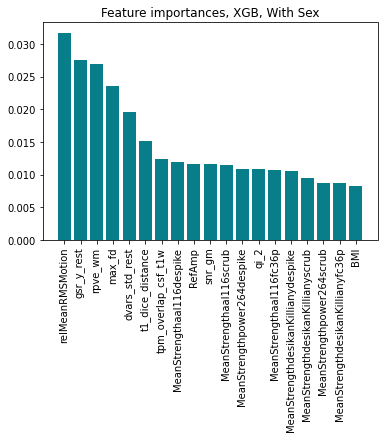

In [166]:
#feature selection using XGB classifier ------ SEX included
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.drop(importances.loc[importances['Importance']<0.007].index, inplace=True)
print(importances)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances, XGB, With Sex')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              Attribute  Importance
152    relMeanRMSMotion    0.031694
76           gsr_y_rest    0.027489
161             rpve_wm    0.026925
83               max_fd    0.023575
47       dvars_std_rest    0.019613
..                  ...         ...
88   meanDVfc36pdespike    0.005513
131                qi_1    0.005422
201              wm2max    0.005032
74            gcor_rest    0.005021
196      tpm_overlap_gm    0.004910

[132 rows x 2 columns]


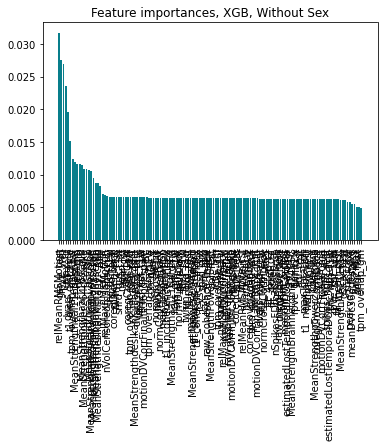

In [167]:
#feature selection using XGB classifier ------ SEX NOT included

model = XGBClassifier()
model.fit(X2_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X2_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances.drop(importances.loc[importances['Importance']<0.004].index, inplace=True)
print(importances)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances, XGB, Without Sex')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


dvars_nstd_rest: 27.705700823011906
estimatedLostTemporalDOFaroma: 13.463283463808345
estimatedLostTemporalDOFfc36pscrub: 19.69638535595964
fd_mean_rest: 13.356490911555944
fd_num_rest: 11.006589003826916
fd_perc_rest: 10.938664648594058
nNuisanceParametersaroma: 13.463283463808345
nSpikesFDfc36pscrub: 19.32389991662744
nVolCensoredfc36pscrub: 19.503142594406174
pctSpikesFDfc36pscrub: 19.32389991693586
relMaxRMSMotion: 12.548513144283733
relMaxRMSMotionaroma: 12.548513144283733
relMaxRMSMotionfc36pdespike: 12.548513144283733
relMaxRMSMotionfc36pscrub: 12.548513144283733
relMeanRMSMotion: 16.527861126743584
relMeanRMSMotionaroma: 16.527861126743584
relMeanRMSMotionfc36pdespike: 16.527861126743584
relMeanRMSMotionfc36pscrub: 16.527861126743584
peakvo2_ml_gxt: 14.070035808341949
fft_4step_t1: 11.585328987036307
fft_4step_t2: 10.722206596190558
fft_stair_ds_tester1: 79.12261650265755


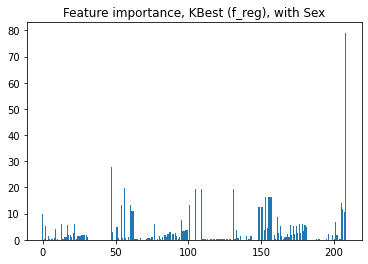

In [168]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#feature selection using SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features1(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features1(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    if(fs.scores_[i]>10):
        print(df.columns[i]+": "+ str(fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('Feature importance, KBest (f_reg), with Sex')
plt.show()

C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


coregJaccardnback: 27.705700823011906
estimatedLostTemporalDOF: 13.463283463808345
estimatedLostTemporalDOFfc36pdespike: 19.69638535595964
fber_t1w: 13.356490911555944
fd_mean_rest: 11.006589003826916
fd_num_rest: 10.938664648594058
nNuisanceParameters: 13.463283463808345
nSpikesDVfc36pscrub: 19.32389991662744
nVolCensoredfc36pdespike: 19.503142594406174
pctSpikesDVfc36pscrub: 19.32389991693586
raw_voxel_size_z: 12.548513144283733
relMaxRMSMotion: 12.548513144283733
relMaxRMSMotionaroma: 12.548513144283733
relMaxRMSMotionfc36pdespike: 12.548513144283733
relMaxRMSMotionnback: 16.527861126743584
relMeanRMSMotion.1: 16.527861126743584
relMeanRMSMotionaroma: 16.527861126743584
relMeanRMSMotionfc36pdespike: 16.527861126743584
Age_y: 14.070035808341949
peakvo2_ml_gxt: 11.585328987036307
fft_4step_t1: 10.722206596190558
fft_4step_t2: 79.12261650265755


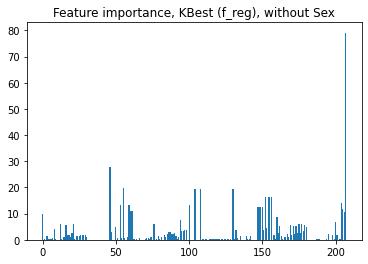

In [169]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#feature selection using SelectKBest, f_regression, sex Not Included
def select_features2(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fsNoSex, X_test_fsNoSex, fsNoSex = select_features2(X2_train, y_train, X2_test)
for i in range(len(fsNoSex.scores_)):
    if(fsNoSex.scores_[i]>10):
        print(df.columns[i]+": "+ str(fsNoSex.scores_[i]))
plt.bar([i for i in range(len(fsNoSex.scores_))], fsNoSex.scores_)
plt.title('Feature importance, KBest (f_reg), without Sex')
plt.show()

BMI: 0.21464805324597958
MeanStrengthdesikanKillianyaroma: 0.217462282439298
MeanStrengthdesikanKillianyscrub: 0.2134040852891168
MeanStrengthpower264scrub: 0.20293045877497362
dvars_nstd_rest: 0.2002312674487725
estimatedLostTemporalDOFfc36pscrub: 0.3029765602593173
motionDVCorrFinalfc36pscrub: 0.2120184117331334
nSpikesFDfc36pscrub: 0.30092842538764497
nVolCensoredfc36pscrub: 0.25859549367618717
pctSpikesFDfc36pscrub: 0.29810037108900245
relMeanRMSMotion: 0.21375199440856196
relMeanRMSMotionaroma: 0.21375199440856196
relMeanRMSMotionfc36pdespike: 0.21375199440856196
relMeanRMSMotionfc36pscrub: 0.21375199440856196
fft_stair_ds_tester1: 0.304263926866954


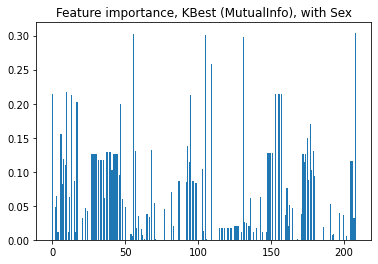

In [170]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#feature selection using SelectKBest, mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

def select_features3(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs2, X_test_fs2, fs2 = select_features3(X_train, y_train, X_test)
for i in range(len(fs2.scores_)):
    if(fs2.scores_[i]>.175):
        print(df.columns[i]+": "+ str(fs2.scores_[i]))
plt.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
plt.title('Feature importance, KBest (MutualInfo), with Sex')
plt.show()

BMI: 0.21464805324597958
MeanStrengthaal116scrub: 0.21895037767739334
MeanStrengthdesikanKillianyfc36p: 0.20923741862245038
MeanStrengthpower264fc36p: 0.19876379210830675
coregJaccardnback: 0.20031807300432813
estimatedLostTemporalDOFfc36pdespike: 0.299504338037095
motionDVCorrFinalfc36pdespike: 0.2026434117331335
nSpikesDVfc36pscrub: 0.304157681833813
nVolCensoredfc36pdespike: 0.2559334566391498
pctSpikesDVfc36pscrub: 0.30312622758544716
relMaxRMSMotionnback: 0.21021299868206622
relMeanRMSMotion.1: 0.21021299868206622
relMeanRMSMotionaroma: 0.21021299868206622
relMeanRMSMotionfc36pdespike: 0.21021299868206622
fft_4step_t2: 0.293650119378146


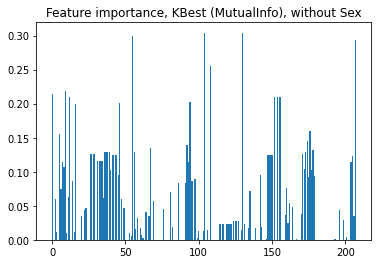

In [171]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#feature selection using SelectKBest, mutual_info_regression, Sex Not Included
from sklearn.feature_selection import mutual_info_regression

def select_features4(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs2NoSex, X_test_fs2NoSex, fs2NoSex = select_features4(X2_train, y_train, X2_test)
for i in range(len(fs2NoSex.scores_)):
    if(fs2NoSex.scores_[i]>.175):
        print(df.columns[i]+": "+ str(fs2NoSex.scores_[i]))
plt.bar([i for i in range(len(fs2NoSex.scores_))], fs2NoSex.scores_)
plt.title('Feature importance, KBest (MutualInfo), without Sex')
plt.show()

In [172]:
#------------------------------------------------------------------------



In [173]:
#Linear Regression, All features (with Sex)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,y_train)
result = model.predict(X_test)
mae = mean_absolute_error(y_test, result)
mse = mean_squared_error(y_test, result)
print('Mean Absolute Error:'+str(mae))
print('Mean Squared Error:'+str(mse))

Mean Absolute Error:1.8214998754913891
Mean Squared Error:5.580124466916227


In [174]:
def select(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=10)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
model = LinearRegression()
model.fit(X_train_fs, y_train)
result1 = model.predict(X_test_fs)
mae1 = mean_absolute_error(y_test, result1)
mse1 = mean_squared_error(y_test, result1)
print('MAE1: %.3f' % mae1)
print('MSE1: %.3f' % mse1)

model = LinearRegression()
model.fit(X_train_fsNoSex, y_train)
result2 = model.predict(X_test_fsNoSex)
mae2 = mean_absolute_error(y_test, result2)
mse2 = mean_squared_error(y_test, result2)
print('MAE2: %.3f' % mae2)
print('MSE2: %.3f' % mse2)

model = LinearRegression()
model.fit(X_train_fs2, y_train)
result3 = model.predict(X_test_fs2)
mae3 = mean_absolute_error(y_test, result3)
mse3 = mean_squared_error(y_test, result3)
print('MAE3: %.3f' % mae3)
print('MSE3: %.3f' % mse3)

model = LinearRegression()
model.fit(X_train_fs2NoSex, y_train)
result4 = model.predict(X_test_fs2NoSex)
mae4 = mean_absolute_error(y_test, result4)
mse4 = mean_squared_error(y_test, result4)
print('MAE4: %.3f' % mae4)
print('MSE4: %.3f' % mse4)



MAE1: 1.821
MSE1: 5.580
MAE2: 2.022
MSE2: 6.745
MAE3: 1.821
MSE3: 5.580
MAE4: 2.022
MSE4: 6.745


In [175]:
structural = ['fwhm','snr','cnr','fber','efc','qi1','qi2','icvs','rpve','inu','summary']
functional = ['efc','fber','fwhm','ghost_x','snr','dvars','gcor','mean_fd','num_fd','perc_fd','outlier','quality']
#X_s = X_f = X.copy(deep=True)
for col in X_s.columns:
    flag = True
    for item in structural:
        if (item in col):
            flag = False
    if(flag):
        del X_s[col]
        
X_f = df.copy(deep=True)
for col in X_f.columns:
    flag = True
    for item in functional:
        if (item in col):
            flag = False
    if(flag):
        del X_f[col]

display(X_s)
y = df['fft_stair_ds_tester1']
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y, test_size=0.2, random_state=42)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y, test_size=0.2, random_state=42)
display(X_s_train)

ss = StandardScaler()
X_s_train_scaled = ss.fit_transform(X_s_train)
X_s_test_scaled = ss.transform(X_s_test)

ss2 = StandardScaler()
X_f_train_scaled = ss2.fit_transform(X_f_train)
X_f_test_scaled = ss2.transform(X_f_test)

,cnr,cnr_t1w,coregCoveragefc36pdespike,coregCoveragefc36pscrub,coregDicefc36pdespike,coregDicefc36pscrub,efc,efc_rest,efc_t1w,fber,...,snr_wm_t1w,snrd_csf,snrd_csf_t1w,snrd_gm,snrd_gm_t1w,snrd_total,snrd_total_t1w,snrd_wm,snrd_wm_t1w,tsnr_rest
1,1.835572,2.127496,0.997899,0.997899,0.933796,0.933796,0.697934,0.338915,0.519994,84.352657,...,19.085859,62.053255,44.890555,28.780894,98.192664,36.477187,87.832092,18.597413,120.413055,22.530750
2,1.896375,1.708366,0.996770,0.996770,0.941584,0.941584,0.720595,0.380976,0.558104,134.822187,...,18.449238,78.333764,39.515269,37.069374,86.996159,46.376649,76.718149,23.726809,103.643018,23.310408
3,1.730708,1.463675,0.995622,0.995622,0.949003,0.949003,0.723089,0.374791,0.559723,48.914619,...,17.713317,82.522330,42.658683,41.536981,94.252138,50.555625,82.180484,27.607565,109.630630,23.844503
5,1.605979,2.072234,0.991546,0.991546,0.935746,0.935746,0.710723,0.366991,0.581170,187.466562,...,20.269964,80.117836,42.650893,38.018459,97.969093,47.541388,86.612092,24.487867,119.216289,26.024578
6,2.052631,2.012681,0.997140,0.997140,0.925152,0.925152,0.713577,0.354161,0.598830,8.003532,...,17.363758,48.962532,26.108876,21.173549,56.860428,27.562171,50.730274,12.550431,69.221518,21.642605
10,2.237201,1.451185,0.998943,0.998943,0.938762,0.938762,0.714122,0.357536,0.596892,15.515005,...,16.323079,55.542560,31.782653,26.902244,67.706783,33.466658,59.519416,17.955170,79.068811,26.399752
11,1.887036,1.994831,0.994979,0.994979,0.925172,0.925172,0.736021,0.368794,0.566209,35.988786,...,17.160592,35.742715,44.517339,16.516458,97.073183,20.873878,86.022980,10.362462,116.478418,22.090466
12,1.666770,1.847848,0.995383,0.995383,0.951809,0.951809,0.687155,0.354999,0.512078,164.751348,...,20.103559,68.871650,44.501277,34.196265,101.498018,41.830742,89.065973,22.424309,121.198625,26.464197
13,1.924135,2.162849,0.997868,0.997868,0.940206,0.940206,0.714994,0.366436,0.527000,78.295684,...,18.157549,79.210249,48.692287,37.750598,103.725326,47.687436,93.017211,26.101463,126.634019,28.067669
14,1.877598,1.679234,0.990815,0.990815,0.940022,0.940022,0.709081,0.377426,0.566140,60.358414,...,18.990958,77.771368,45.488530,34.600760,100.429288,45.136317,88.249577,23.036822,118.830912,26.101809


,cnr,cnr_t1w,coregCoveragefc36pdespike,coregCoveragefc36pscrub,coregDicefc36pdespike,coregDicefc36pscrub,efc,efc_rest,efc_t1w,fber,...,snr_wm_t1w,snrd_csf,snrd_csf_t1w,snrd_gm,snrd_gm_t1w,snrd_total,snrd_total_t1w,snrd_wm,snrd_wm_t1w,tsnr_rest
51,2.089724,1.503386,0.999186,0.999186,0.937769,0.937769,0.750940,0.379755,0.586191,1.809168,...,18.071700,58.091250,46.788341,25.682502,102.138961,33.271881,89.439635,16.041892,119.391602,20.644810
5,1.605979,2.072234,0.991546,0.991546,0.935746,0.935746,0.710723,0.366991,0.581170,187.466562,...,20.269964,80.117836,42.650893,38.018459,97.969093,47.541388,86.612092,24.487867,119.216289,26.024578
94,2.488256,1.722381,0.998085,0.998085,0.935538,0.935538,0.717931,0.423801,0.631780,43.517174,...,19.820383,88.451197,29.130272,38.900612,66.875370,50.800595,58.247955,25.049976,78.738222,21.586872
28,1.407198,1.969748,0.999179,0.999179,0.927041,0.927041,0.733472,0.356413,0.612323,34.439816,...,14.318651,48.709830,31.570946,22.040330,68.543120,28.075046,61.376991,13.474979,84.016907,22.922688
13,1.924135,2.162849,0.997868,0.997868,0.940206,0.940206,0.714994,0.366436,0.527000,78.295684,...,18.157549,79.210249,48.692287,37.750598,103.725326,47.687436,93.017211,26.101463,126.634019,28.067669
11,1.887036,1.994831,0.994979,0.994979,0.925172,0.925172,0.736021,0.368794,0.566209,35.988786,...,17.160592,35.742715,44.517339,16.516458,97.073183,20.873878,86.022980,10.362462,116.478418,22.090466
68,1.992961,2.177739,0.997037,0.997037,0.926348,0.926348,0.768402,0.407898,0.623270,3.288607,...,16.780865,36.652553,34.209761,15.745506,77.835642,20.352821,69.496109,8.660403,96.442923,20.982403
6,2.052631,2.012681,0.997140,0.997140,0.925152,0.925152,0.713577,0.354161,0.598830,8.003532,...,17.363758,48.962532,26.108876,21.173549,56.860428,27.562171,50.730274,12.550431,69.221518,21.642605
76,1.840457,1.645526,0.996331,0.996331,0.945647,0.945647,0.724865,0.361773,0.566569,50.272832,...,20.091918,49.927472,46.662821,26.085167,99.003835,31.040944,87.606942,17.110194,117.154170,22.632542
30,2.342015,1.482947,0.995683,0.995683,0.947116,0.947116,0.732667,0.339140,0.544542,8.549214,...,18.514454,90.043183,47.251328,43.857735,103.942879,54.106864,91.078065,28.419673,122.039987,24.116951


C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
     Attribute  Importance
38     rpve_wm    0.052422
28     icvs_wm    0.043168
47      snr_wm    0.032120
48  snr_wm_t1w    0.030776
21      fwhm_z    0.030522


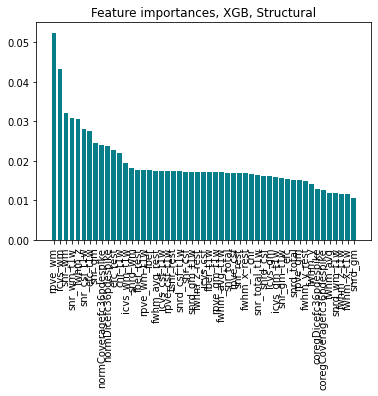

C:\Users\bnish\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:12:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      Attribute  Importance
22       fwhm_z    0.047728
43  snrd_gm_t1w    0.039674
25    gcor_rest    0.034485
9       efc_t1w    0.031411
47  snrd_wm_t1w    0.031312


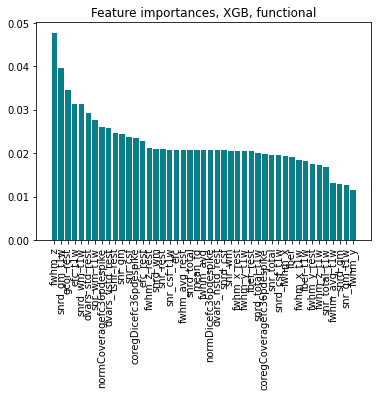

In [176]:
#feature selection using XGB classifier ------ structural and functional
model = XGBClassifier()
model.fit(X_s_train_scaled, y_s_train)
importances_s = pd.DataFrame(data={
    'Attribute': X_s_train.columns,
    'Importance': model.feature_importances_
})
importances_s = importances_s.sort_values(by='Importance', ascending=False)
importances_s.drop(importances_s.loc[importances_s['Importance']<0.01].index, inplace=True)
print(importances_s.head())
plt.bar(x=importances_s['Attribute'], height=importances_s['Importance'], color='#087E8B')
plt.title('Feature importances, XGB, Structural')
plt.xticks(rotation='vertical')
plt.show()

model = XGBClassifier()
model.fit(X_f_train_scaled, y_f_train)
importances_f = pd.DataFrame(data={
    'Attribute': X_f_train.columns,
    'Importance': model.feature_importances_
})
importances_f = importances_f.sort_values(by='Importance', ascending=False)
importances_f.drop(importances_f.loc[importances_f['Importance']<0.01].index, inplace=True)
print(importances_f.head())
plt.bar(x=importances_f['Attribute'], height=importances_f['Importance'], color='#087E8B')
plt.title('Feature importances, XGB, functional')
plt.xticks(rotation='vertical')
plt.show()

In [177]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#Regression with tuned number of features
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X_train.shape[1]-(X_train.shape[1]-1), X_train.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_train, y_train)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

KeyboardInterrupt: 

In [ ]:
print("Actual    Predicted")
count = 0
for i in y_test:
    print(str(i)+"  "+str(results.predict(X_test)[count]))
    count+=1

In [ ]:
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#Regression with tuned number of features NO SEX
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X2_train.shape[1]-(X2_train.shape[1]-1), X2_train.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X2_train, y_train)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

In [ ]:
print("Actual    Predicted")
count = 0
for i in y2_test:
    print(str(i)+"  "+str(results.predict(X2_test)[count]))
    count+=1

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(
    estimator=DecisionTreeRegressor(),
    n_features_to_select=3,
)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pipeline.fit(X, y)
pipeline.predict(X_test)
count = 0
for i in y_test:
    print(str(i)+"  "+str(pipeline.predict(X_test)[count]))
    count+=1
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
#https://machinelearningmastery.com/rfe-feature-selection-in-python/
#code pulled from above website to get best model from Logistic,D

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	model = DecisionTreeRegressor()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	model = DecisionTreeRegressor()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
	model = DecisionTreeRegressor()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=5)
	model = DecisionTreeRegressor()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(scores)
    print(name+" "+mean(scores)+" "+ std(scores))